# <u> Module 4 Challenge </u>
## <i> Portfolio Quantitative Analysis </i>

In [169]:
#Module 4 Challenge
#Portfolio Quantitative Analysis

### Import libraries and dependencies

In [170]:
#Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

%matplotlib inline

### Set Files Paths and Read CSV as Dataframe

In [171]:
#Set the file paths 
whale_path = Path("Starter_Code/Resources/whale_returns.csv")
algo_path = Path("Starter_Code/Resources/algo_returns.csv")
sp_tsx_path = Path("Starter_Code/Resources/sp_tsx_history.csv")

#Read the .CSVs and set the 'date' column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

### Clean Data and Drop NAN/NA & Null Values

In [172]:
#Clean data - Drop NA & Null Values 
whale_df = whale_df.dropna().copy()
algo_df = algo_df.dropna().copy()
sp_tsx_df = sp_tsx_df.dropna().copy()

#Clean up dollar sign ($) ascii character(s) from second price column 
#sp_tsx_df['Close'] = sp_tsx_df['Close'].replace('$', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].replace('\$|,', '', regex=True)
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)

#sp_tsx_df

#test to see if 0/NAN data is removed; looks good so far
#whale_df.iloc[40:60,:]

### Calculate S&P TSX 60 Daily Returns

In [173]:
#Calculate daily returns from S&P TSX 60 CSV data table to prepare for concat with the other data tables
sp_tsx_df['Close'].dtypes

daily_returns_sp_tsx = sp_tsx_df.pct_change()
daily_returns_sp_tsx = daily_returns_sp_tsx.dropna().copy()

#Print sample of daily returns for the S&P TSX 60 dataframe
daily_returns_sp_tsx.head(5)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


### Concatenate All Whale, Algo, and S&P TSX 60 DataFrames Into Singular Daily Returns Combined DataFrame

In [175]:
#Create a new Dataframe where the columns are the closing prices for each ticker
combined_df = pd.concat([whale_df, algo_df, daily_returns_sp_tsx], axis="columns", join="inner")
combined_df = combined_df.rename(columns={"Close":"S&P TSX 60"})
combined_df = combined_df.sort_index(ascending=True)
combined_df.head(4)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


### Plot of Daily Returns for All Portfolios

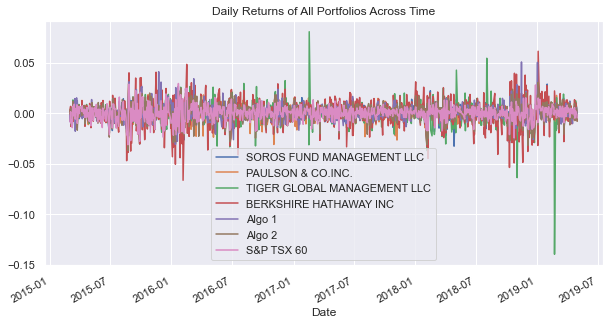

In [176]:
#Calculate and plot daily returns for all portfolios
combined_df.plot(figsize=(10,5), title="Daily Returns of All Portfolios Across Time")

### Calculate and Plot Cumulative Returns For All Portfolios Across Time

#### i.) 'Whale' Portfolio Cumulative Returns

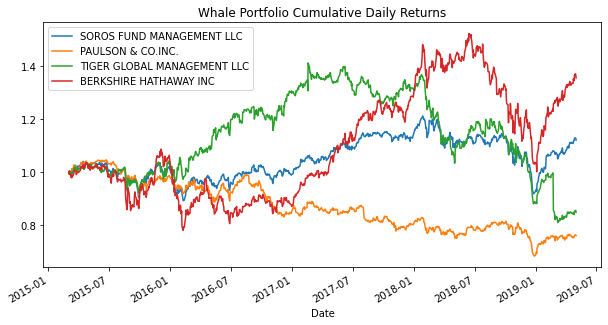

In [107]:
#Set initial investment
whale_initial_inv = 10000

#Use the 'cumprod' function to calculate the whale stock portfolio's cumulative returns
whale_cumulative_returns = (1 + combined_df[["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC. ", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"]]).cumprod()
whale_cumulative_returns.plot(figsize=(10,5), title="Whale Portfolio Cumulative Daily Returns")

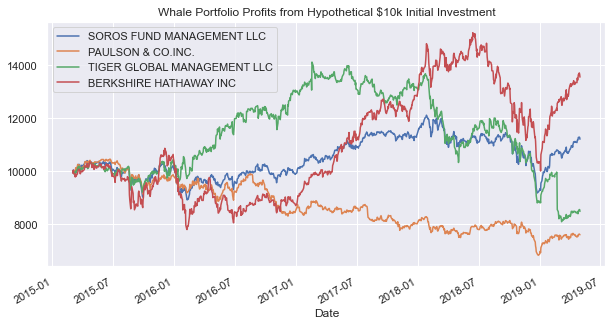

In [178]:
#Hypothetical Cumulative Daily Returns on Whale Portfolio's (Normalized to an Initial Investment of $10,000)
whale_cumulative_profits = (whale_initial_inv*whale_cumulative_returns)
whale_cumulative_profits.plot(figsize=(10,5), title="Whale Portfolio Profits from Hypothetical $10k Initial Investment")

#### ii.) Algo Portfolio Cumulative Returns

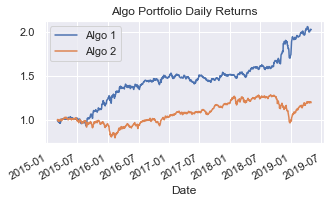

In [179]:
#Set initial investment 
algo_initial_inv = 10000

#Use the 'cumprod' function to calculate the algo portfolio's cumulative returns 
algo_cumulative_returns = (1 + combined_df[["Algo 1", "Algo 2"]]).cumprod()
algo_cumulative_returns.plot(figsize=(5,2.5), title="Algo Portfolio Daily Returns")

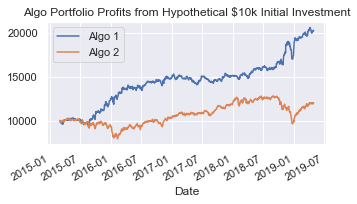

In [180]:
#Hypothetical Cumulative Daily Returns on Algo Portfolio's (Normalized to an Initial Investment of $10,000)
algo_cumulative_profits = (algo_initial_inv*algo_cumulative_returns)
algo_cumulative_profits.plot(figsize=(5,2.5), title="Algo Portfolio Profits from Hypothetical $10k Initial Investment")

### iii.) S&P TSX 60 Cumulative Returns

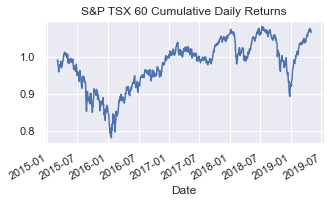

In [181]:
#Set initial investment
sp_tsx_initial_inv = 10000

#Use the 'cumprod' function to calculate the S&P TSX 60 cumulative retruns
sp_tsx_cumulative_returns = (1 + combined_df["S&P TSX 60"]).cumprod()
sp_tsx_cumulative_returns.plot(figsize=(5,2.5), title="S&P TSX 60 Cumulative Daily Returns")

### Calculate and Plot Cumulative Returns for All Portfolios

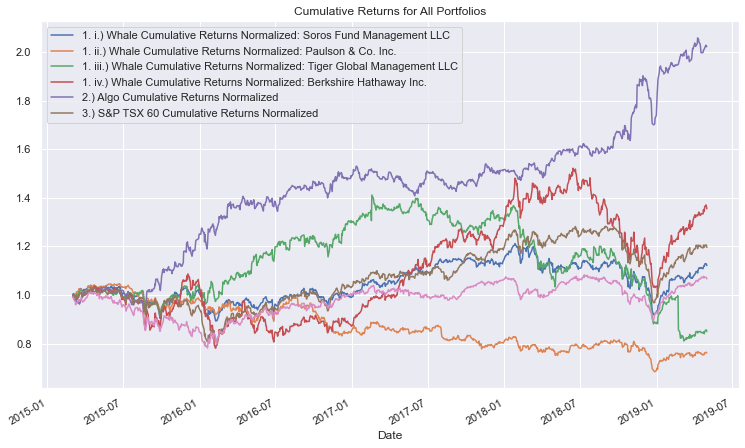

In [182]:
# Set the figure of the chart and plot each trend on the single figure
ax = whale_cumulative_returns.plot(figsize=(12.5,7.5), title="Cumulative Returns for All Portfolios", grid=True)
algo_cumulative_returns.plot(ax=ax)
sp_tsx_cumulative_returns.plot(ax=ax)

ax.legend(['1. i.) Whale Cumulative Returns Normalized: Soros Fund Management LLC',
           '1. ii.) Whale Cumulative Returns Normalized: Paulson & Co. Inc.',
           '1. iii.) Whale Cumulative Returns Normalized: Tiger Global Management LLC',
           '1. iv.) Whale Cumulative Returns Normalized: Berkshire Hathaway Inc.',
           '2.) Algo Cumulative Returns Normalized', 
           '3.) S&P TSX 60 Cumulative Returns Normalized'])

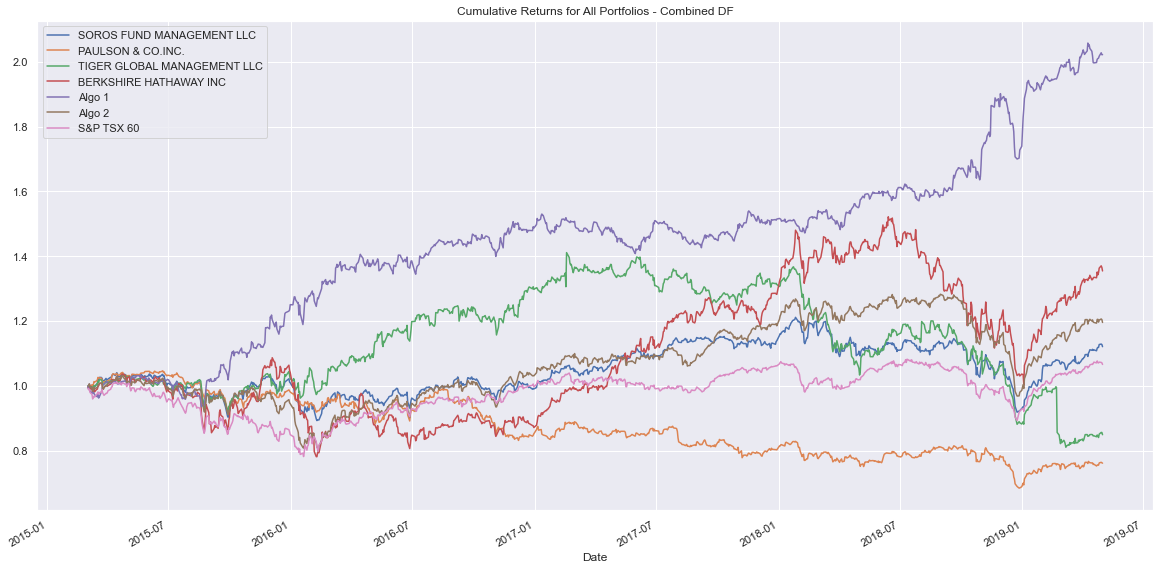

In [183]:
combined_cumulative_returns = (1 + combined_df).cumprod()
combined_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns for All Portfolios - Combined DF", grid=True)

In [184]:
combined_cumulative_returns.head(4)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589


### Portfolios Quantitatively Outperforming the S&P TSX 60:
#### It appears there are four portfolios currently outperforming the S&P index: i.)Soros Fund Management LLC, ii.) Berkshire Hathaway, iii.) Algo Portfolio 1 and iv.) Algo Portfolio 2. 

### Box Plot for Each Portfolio Return

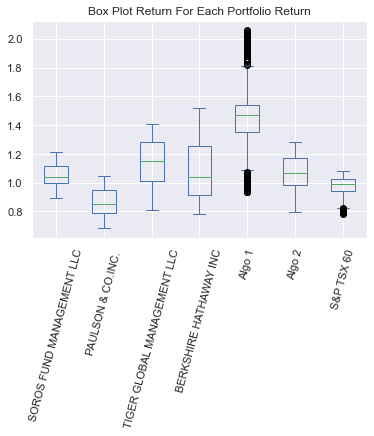

In [185]:
#Box plot for each return
combined_cumulative_returns.plot.box(title="Box Plot Return For Each Portfolio Return", rot=75)

### Calculate Standard Deviation of Daily Returns

#### i.) Whale Portfolio Daily Standard Deviations

In [186]:
#Whale Portfolio Daily Standard Deviations
whale_daily_std = whale_cumulative_returns.std()
whale_daily_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
dtype: float64

#### ii.) Algo Portfolio Daily Standard Deviations

In [187]:
#Algo Portfolio Daily Standard Deviations
algo_daily_std = algo_cumulative_returns.std()
algo_daily_std

Algo 1    0.258839
Algo 2    0.116607
dtype: float64

#### iii.) S&P TSX 60 Daily Standard Deviations

In [188]:
#S&P TSX 60 Daily Standard Deviations
sp_tsx_std = sp_tsx_cumulative_returns.std()
sp_tsx_std

0.06435360632809134

In [189]:
#Combined DF Daily Standard Deviations
combined_daily_std = combined_cumulative_returns.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
S&P TSX 60                     0.064354
dtype: float64

### Portfolios Riskier Than the S&P TSX 60

In [190]:
if ((combined_daily_std['SOROS FUND MANAGEMENT LLC']) > (combined_daily_std['S&P TSX 60'])):
    print(f"SOROS FUND MANAGEMENT LLC is riskier than the S&P TSX 60 with a std deviation of " 
        f"{round(combined_daily_std['SOROS FUND MANAGEMENT LLC'], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than SOROS FUND MANAGEMENT LLC"
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std['SOROS FUND MANAGEMENT LLC'], 4)}, respectively.")


SOROS FUND MANAGEMENT LLC is riskier than the S&P TSX 60 with a std deviation of 0.0703 and 0.0644, respectively.


In [191]:
if ((combined_daily_std[1]) > (combined_daily_std['S&P TSX 60'])):
    print(f"PAULSON & CO.INC. is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[1], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than PAULSON & CO.INC."
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[1], 4)}, respectively.")   

PAULSON & CO.INC. is riskier than the S&P TSX 60 with a std deviation of 0.0907 and 0.0644, respectively.


In [192]:
if ((combined_daily_std[2]) > (combined_daily_std['S&P TSX 60'])):
    print(f"TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[2], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than TIGER GLOBAL MANAGEMENT LLC."
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[2], 4)}, respectively.")   

TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P TSX 60 with a std deviation of 0.1487 and 0.0644, respectively.


In [193]:
if ((combined_daily_std[3]) > (combined_daily_std['S&P TSX 60'])):
    print(f"BERKSHIRE HATHAWAY INC is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[3], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than BERKSHIRE HATHAWAY INC"
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[3], 4)}, respectively.")   

BERKSHIRE HATHAWAY INC is riskier than the S&P TSX 60 with a std deviation of 0.1969 and 0.0644, respectively.


In [194]:
if ((combined_daily_std[4]) > (combined_daily_std['S&P TSX 60'])):
    print(f"Algo 1 is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[4], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than Algo 1."
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[4], 4)}, respectively.")   

Algo 1 is riskier than the S&P TSX 60 with a std deviation of 0.2588 and 0.0644, respectively.


In [195]:
if ((combined_daily_std[5]) > (combined_daily_std['S&P TSX 60'])):
    print(f"Algo 2 is riskier than the S&P TSX 60 with a std deviation of "
          f"{round(combined_daily_std[5], 4)} and {round(combined_daily_std['S&P TSX 60'], 4)}, respectively.")
else:
    print("The S&P TSX 60 is riskier than Algo 2."
        f" with a std deviation of {round(combined_daily_std['S&P TSX 60'], 4)} and {round(combined_daily_std[5], 4)}, respectively.")   

Algo 2 is riskier than the S&P TSX 60 with a std deviation of 0.1166 and 0.0644, respectively.


### Calculate the Annualised Standard Deviations / Volatility of All Portfolios

In [196]:
#Volatility 
combined_annual_std = combined_df.std() * np.sqrt(252)
combined_annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

### Rolling Statistics

#### i.) 21-Day Window Rolling Standard Deviation (All Portfolios)

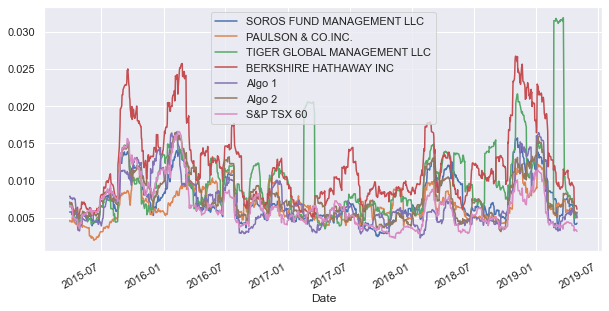

In [198]:
#Rolling 21-Day Std Deviation for All Portfolios
combined_df.rolling(window=21).std().plot(figsize=(10,5))

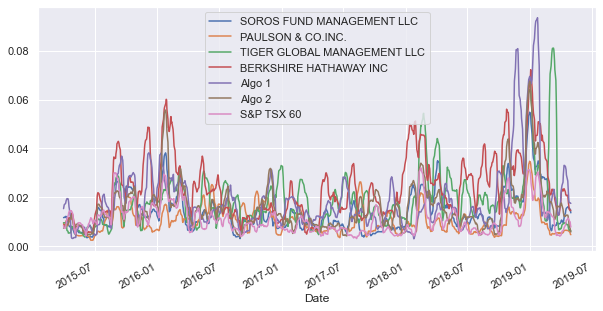

In [199]:
combined_cumulative_returns.rolling(window=21).std().plot(figsize=(10,5))

#### ii.) Price & Daily Return Correlations Between Each Stock

##### 1.) Daily Return Correlation Amongst All Portfolios

In [30]:
#Daily Return Correlation Amongst All Portfolios
daily_return_correlation = combined_df.corr()
daily_return_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


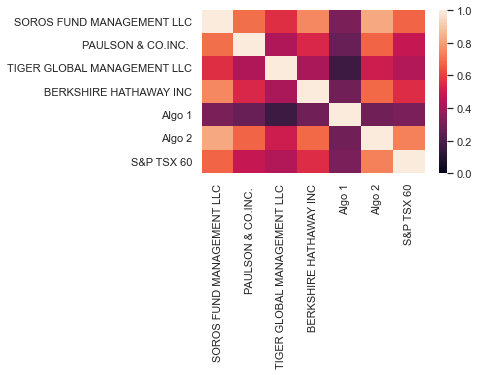

In [122]:
#Plot of Daily Return Correlation Amongst All Portfolios
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(daily_return_correlation, vmin=0, vmax=1)

##### Therefore, according to daily return correlation analysis across all portfolios - comparatively, to the S&P TSX 60 - it appears SOROS FUND MANAGEMENT LLC & Algo 2 have the closest daily return correlation, at 0.674 and 0.737, respectively.

##### 2.) Price Correlation Amongst All Portfolios

In [201]:
#Price Correlation Amongst All Portfolios
price_correlation = combined_cumulative_returns.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,-0.599250,0.428731,0.879331,0.419924,0.898351,0.809598
PAULSON & CO.INC.,-0.599250,1.000000,-0.167546,-0.710741,-0.876459,-0.736731,-0.604204
TIGER GLOBAL MANAGEMENT LLC,0.428731,-0.167546,1.000000,0.064462,0.047300,0.242755,0.370814
BERKSHIRE HATHAWAY INC,0.879331,-0.710741,0.064462,1.000000,0.524672,0.920725,0.720103
Algo 1,0.419924,-0.876459,0.047300,0.524672,1.000000,0.590275,0.528311
Algo 2,0.898351,-0.736731,0.242755,0.920725,0.590275,1.000000,0.886327
S&P TSX 60,0.809598,-0.604204,0.370814,0.720103,0.528311,0.886327,1.000000


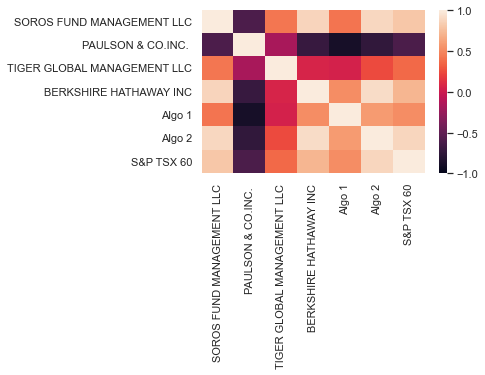

In [202]:
#Plot of Price Correlation Amongst All Portfolios
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(price_correlation, vmin=-1, vmax=1)

#### iii.) 60-Day Rolling Beta Between SOROS FUND MANAGEMENT LLC Portfolio and the S&P TSX 60 

##### 1.) Calculation of covariance of all daily returns of SOROS FUND MANAGEMENT LLC vs. S&P TSX 60 

In [205]:
# Calculation of covariance of all daily returns of SOROS vs. S&P TSX 60 
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P TSX 60'])
covariance

3.710689907855223e-05

##### 2.) Calculation of the Variance of the S&P TSX 60

In [204]:
# Calculation of the Variance of the S&P TSX 60
variance = combined_df['S&P TSX 60'].var()
variance

4.9479515915131015e-05

##### 3.) Calculate the Beta of SOROS FUND MANAGEMENT LLC

In [206]:
# Calculate the Beta of SOROS FUND MANAGEMENT LLC
soros_beta = covariance/variance
soros_beta

0.7499446668435332

##### 4.) Calculate 60-Day Rolling Beta Between SOROS vs S&P TSX 60

###### a.) Calculate 60-Day Rolling Covariance of SOROS Returns vs S&P TSX 60

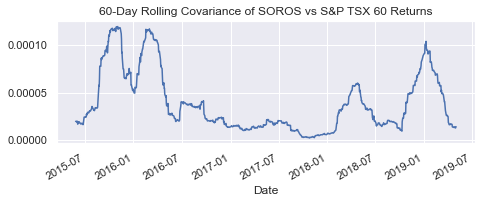

In [210]:
# 60-Day Cov SOROS
rolling_covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P TSX 60'])
rolling_covariance_soros.plot(figsize=(7.5,2.5), title="60-Day Rolling Covariance of SOROS vs S&P TSX 60 Returns")

###### b.) Calculate the 60-Day Rolling Variance of the S&P TSX 60

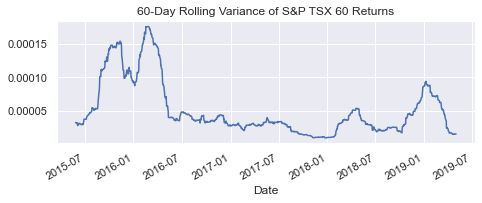

In [211]:
# 60-Day Var S&P 
rolling_variance_sp60 = combined_df['S&P TSX 60'].rolling(window=60).var()
rolling_variance_sp60.plot(figsize=(7.5,2.5), title="60-Day Rolling Variance of S&P TSX 60 Returns")

###### c.) Calculate 60-Day Rolling Beta Between SOROS and S&P TSX 60

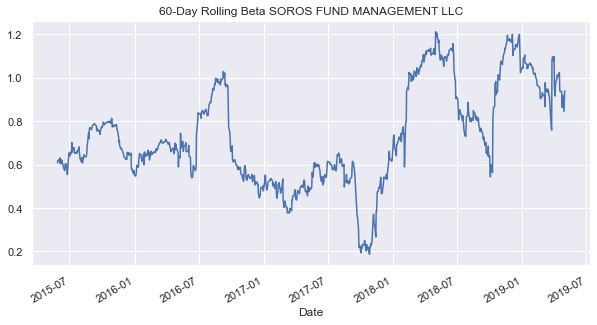

In [212]:
# 60 Day Beta
rolling_beta_soros = rolling_covariance_soros/rolling_variance_sp60
rolling_beta_soros.plot(figsize=(10,5), title="60-Day Rolling Beta SOROS FUND MANAGEMENT LLC")

### Rolling Statistics: Exponentially Weighted Average

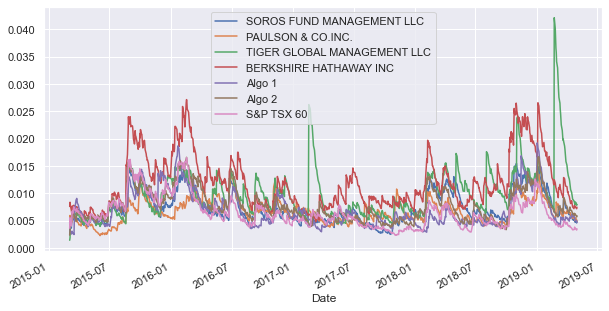

In [213]:
# Rolling Statistics: Exponentially Weighted Average
combined_ewm_21 = combined_df.ewm(span=21, adjust=False).std()
combined_ewm_21.plot(figsize=(10,5))

### Sharpe Ratios

#### i.) Sharpe Ratios of Portfolio as a Function of Basic Daily Returns

In [215]:
# Sharpe Ratios of All Portfolios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

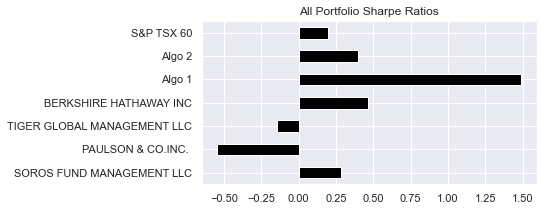

In [216]:
sharpe_ratios.plot(kind="barh", figsize=(6,3), title="All Portfolio Sharpe Ratios", color="black", grid=True)

In [40]:
if (sharpe_ratios['Algo 1' or 'Algo 2'] > sharpe_ratios['S&P TSX 60']):
    print("Therefore, it is determined that the algo trading portfolios outperform the S&P TSX 60.")
else:
    print("Therefore, it is determined that the algo trading portfolios do not outperform the S&P TSX 60.")

Therefore, it is determined that the algo trading portfolios outperform the S&P TSX 60.


### Custom Portfolio

#### i.) TSLA Daily Historical Stock Performance [2015,03,03]-[2019,05,01]

In [220]:
#TSLA (Tesla) Daily Historical Stock Performance [2015,03,03]-[2019,05,01]
#=GOOGLEFINANCE("NASDAQ:TSLA","close",DATE(2015,3,3),DATE(2019,5,1),"DAILY")

#Set filepath for TSLA csv data
tsla_path = Path("Starter_Code/Resources/tsla_historical.csv")

#Read the .CSVs and set the 'date' column as a datetime index to the DataFrame
tsla_df = pd.read_csv(tsla_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Convert the daily closing TSLA price to daily returns via percent change formula 
daily_tsla_df = tsla_df.pct_change()
daily_tsla_df = daily_tsla_df.dropna().copy()
daily_tsla_df = daily_tsla_df.rename(columns={"Close": "TSLA"})

#Print sample of daily returns for the TSLA dataframe
daily_tsla_df.head(5)

,TSLA
Date,
2015-03-04,0.015038
2015-03-05,-0.008889
2015-03-06,-0.033632
2015-03-09,-0.015468
2015-03-10,-0.003142


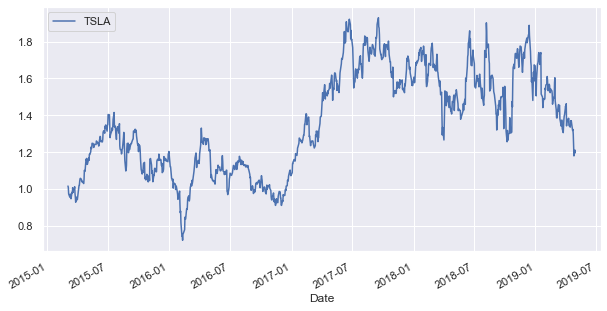

In [221]:
#Cumulatively aggregate TSLA stock price returns over timeframe
tsla_cumulative = (1 + daily_tsla_df).cumprod()
tsla_cumulative.plot(figsize=(10,5))

#### ii.) ENPH Historical Stock Performance [2015,03,03]-[2019,05,01]

In [222]:
#ENPH (Enphase Energy Inc) Daily Historical Stock Performance [2015,03,03]-[2019,05,01]
#=GOOGLEFINANCE("NASDAQ:ENPH","close",DATE(2015,3,3),DATE(2019,5,1),"DAILY")

#Set filepath for ENPH csv data
enph_path = Path("Starter_Code/Resources/enph_historical.csv")

#Read the .CSVs and set the 'date' column as a datetime index to the DataFrame
enph_df = pd.read_csv(enph_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Convert the daily closing TSLA price to daily returns via percent change formula
daily_enph_df = enph_df.pct_change()
daily_enph_df = daily_enph_df.dropna().copy()
daily_enph_df = daily_enph_df.rename(columns={"Close": "ENPH"})

#Print sample of daily returns for the ENPH dataframe
daily_enph_df.head()

,ENPH
Date,
2015-03-04,0.017951
2015-03-05,0.052902
2015-03-06,0.053733
2015-03-09,-0.060927
2015-03-10,-0.076164


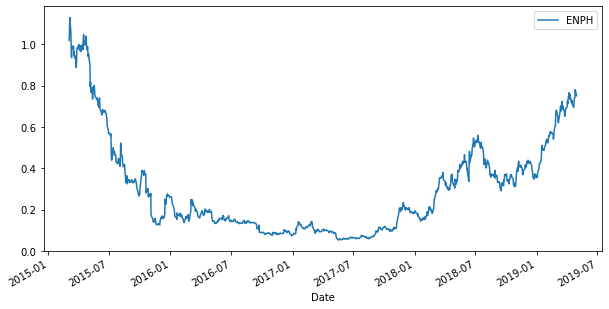

In [85]:
#Cumulatively aggregate ENPH stock price returns over timeframe
enph_cumulative = (1 + daily_enph_df).cumprod()
enph_cumulative.plot(figsize=(10,5))

#### iii.) HD Historical Stock Performance [2015,03,03]-[2019,05,01]

In [223]:
#HD (Home Depot) Daily Historical Stock Performance [2015,03,03]-[2019,05,01]
#=GOOGLEFINANCE("NYSE: HD","close",DATE(2015,3,3),DATE(2019,5,1),"DAILY")

#Set filepath for HD csv data
hd_path = Path("Starter_Code/Resources/hd_historical.csv")

#Read the .CSVs and set the 'date' column as a datetime index to the DataFrame
hd_df = pd.read_csv(hd_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Convert the daily closing TSLA price to daily returns via percent change formula
daily_hd_df = hd_df.pct_change()
daily_hd_df = daily_hd_df.dropna().copy()
daily_hd_df = daily_hd_df.rename(columns={"Close": "HD"})

#Print sample of daily returns for the ENPH dataframe
daily_hd_df.head()

,HD
Date,
2015-03-04,-0.011286
2015-03-05,0.010021
2015-03-06,-0.012596
2015-03-09,0.006990
2015-03-10,-0.023341


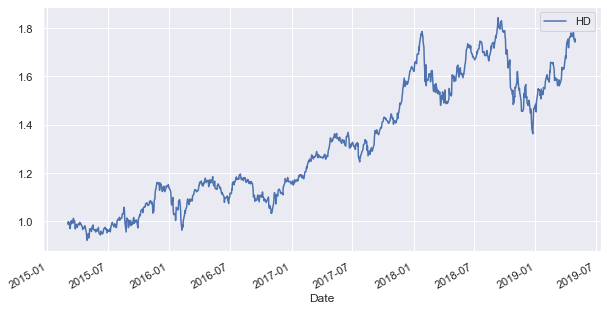

In [224]:
#Cumulatively aggregate HD stock price returns over timeframe
hd_cumulative = (1 + daily_hd_df).cumprod()
hd_cumulative.plot(figsize=(10,5))

In [225]:
#Concatenate All Separate Daily Returns into a Single Dataframe
all_daily_custom_returns_df = pd.concat([daily_tsla_df, daily_enph_df, daily_hd_df], axis="columns", join="inner")
all_daily_custom_returns_df

,TSLA,ENPH,HD
Date,,,
2015-03-04,0.015038,0.017951,-0.011286
2015-03-05,-0.008889,0.052902,0.010021
2015-03-06,-0.033632,0.053733,-0.012596
2015-03-09,-0.015468,-0.060927,0.006990
2015-03-10,-0.003142,-0.076164,-0.023341
...,...,...,...
2019-04-24,-0.019898,0.008205,0.003252
2019-04-25,-0.042343,0.008138,-0.001064
2019-04-26,-0.050273,0.052472,-0.013995


In [226]:
#Concatenate All Separate Cumulative Portfolio Returns into a Single Dataframe
all_custom_cumulative_df = pd.concat([tsla_cumulative, enph_cumulative, hd_cumulative], axis="columns", join="inner")
all_custom_cumulative_df

,TSLA,ENPH,HD
Date,,,
2015-03-04,1.015038,1.017951,0.988714
2015-03-05,1.006015,1.071803,0.998622
2015-03-06,0.972180,1.129394,0.986043
2015-03-09,0.957143,1.060583,0.992935
2015-03-10,0.954135,0.979806,0.969760
...,...,...,...
2019-04-24,1.296241,0.735228,1.780994
2019-04-25,1.241353,0.741212,1.779099
2019-04-26,1.178947,0.780105,1.754200


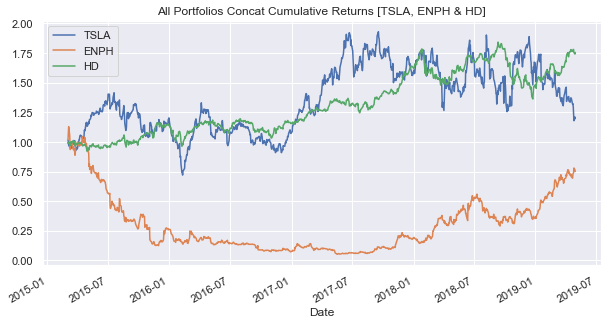

In [227]:
all_custom_cumulative_df.plot(figsize=(10,5), title="All Portfolios Concat Cumulative Returns [TSLA, ENPH & HD]")

#### Equally Weighted Portfolio Return

##### a.) Weighted Custom Cumulative (.dot) Portfolio Returns [weighted_custom_cumulative_df]

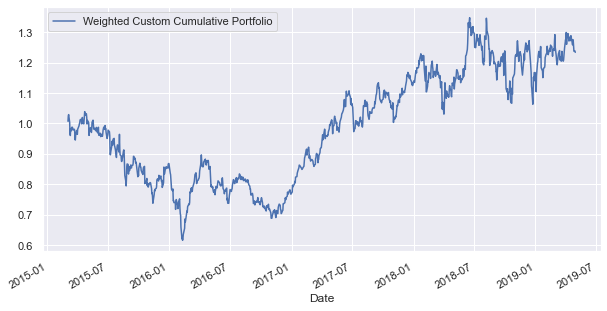

In [228]:
# Set weights 
weights = [1/3, 1/3, 1/3]

# Use the dot function to multiply the previously concatenated custom cumulative portfolio returns into a weighted product
weighted_custom_cumulative_df = all_custom_cumulative_df.dot(weights)

#Convert the series dot product result back to its Dataframe format
weighted_custom_cumulative_df = pd.DataFrame(weighted_custom_cumulative_df)
weighted_custom_cumulative_df = weighted_custom_cumulative_df.rename({0: 'Weighted Custom Cumulative Portfolio'}, axis='columns')
weighted_custom_cumulative_df.plot(figsize=(10,5))

##### b.) Weighted Custom Daily Return Portfolio Returns [weighted_custom_daily_df]

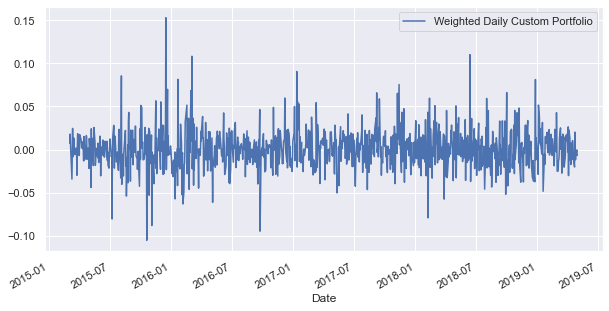

In [229]:
# Set weights (re-using the previous weight variable is sufficient)
weights

# Use the dot function to multiply the previously concatenated custom daily portfolio returns into a weighted product
weighted_custom_daily_df= all_daily_custom_returns_df.dot(weights)

#Convert the series dot product result back to its Dataframe format
weighted_custom_daily_df = pd.DataFrame(weighted_custom_daily_df)
weighted_custom_daily_df = weighted_custom_daily_df.rename({0: "Weighted Daily Custom Portfolio"}, axis='columns')
weighted_custom_daily_df.head(3)
weighted_custom_daily_df.plot(figsize=(10,5))

### Concatenate Original Combined Professional Cumulative Portfolios Dataframe with Custom Cumulative Portfolio

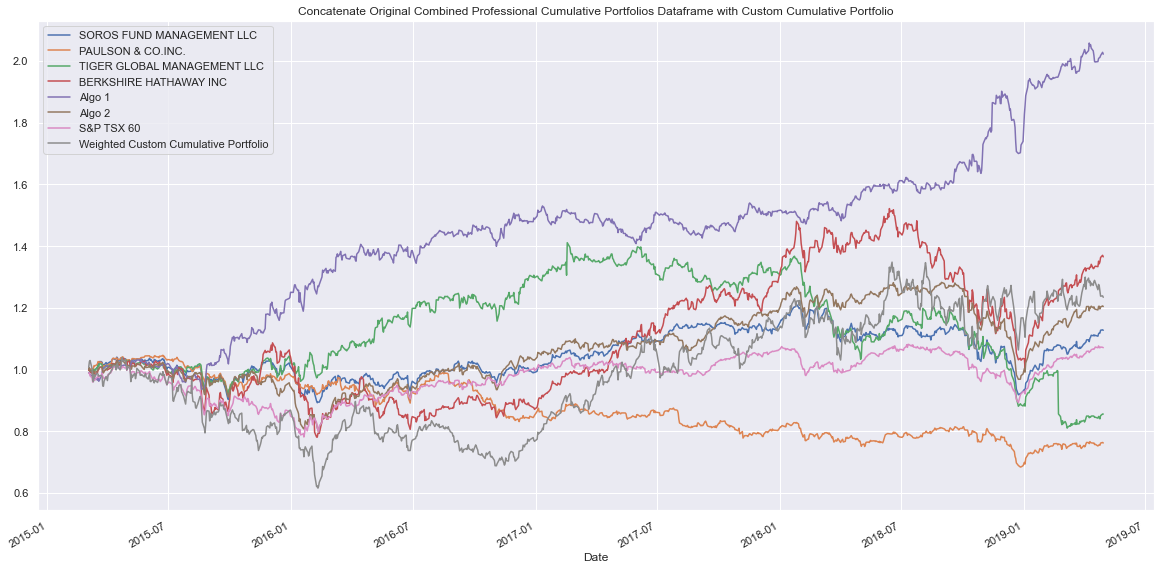

In [230]:
# Concatenate Original Combined Professional Cumulative Portfolios Dataframe with Custom Cumulative Portfolio
final_cumulative_returns_df = pd.concat([combined_cumulative_returns, weighted_custom_cumulative_df], axis="columns", join="inner")
final_cumulative_returns_df.plot(figsize=(20,10), title="Concatenate Original Combined Professional Cumulative Portfolios Dataframe with Custom Cumulative Portfolio", grid=True)

### Final Analysis (All Portfolios Including Custom Weighted Portfolio Dataframe)

#### a.) Concatenate Original Combined Professional Daily Return Portfolios Dataframe with Custom Daily Return Portfolio 

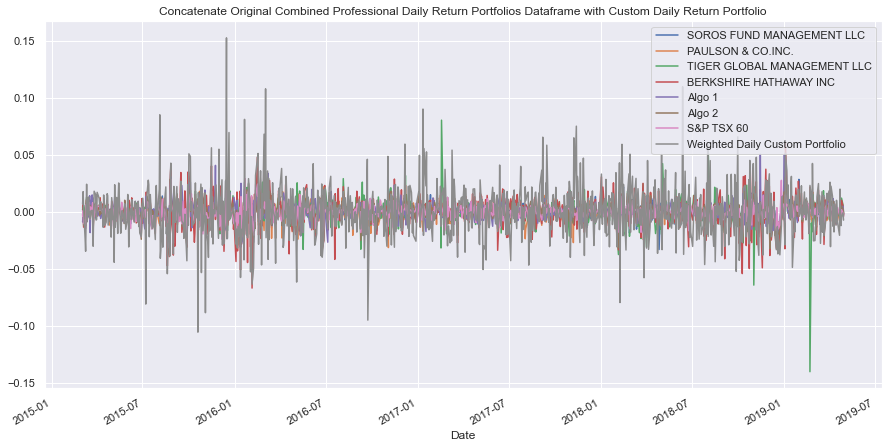

In [231]:
# Concatenate Original Combined Professional Daily Return Portfolios Dataframe with Custom Daily Return Portfolio 
final_daily_returns_df = pd.concat([combined_df, weighted_custom_daily_df], axis="columns", join="inner")
final_daily_returns_df.plot(figsize=(15,7.5), title="Concatenate Original Combined Professional Daily Return Portfolios Dataframe with Custom Daily Return Portfolio")

#### b.) Calculate the Final Annualised Standard Deviations / Volatility of All Portfolios Including Weighted Custom Portfolio

In [232]:
# Volatility
final_annual_std = final_daily_returns_df.std() * np.sqrt(252)
final_annual_std

SOROS FUND MANAGEMENT LLC          0.124343
PAULSON & CO.INC.                  0.110923
TIGER GLOBAL MANAGEMENT LLC        0.172883
BERKSHIRE HATHAWAY INC             0.203727
Algo 1                             0.120580
Algo 2                             0.132251
S&P TSX 60                         0.111666
Weighted Daily Custom Portfolio    0.362696
dtype: float64

#### c.) 21-Day Window Rolling Standard Deviation (All Portfolios Including Weighted Custom Portfolio)

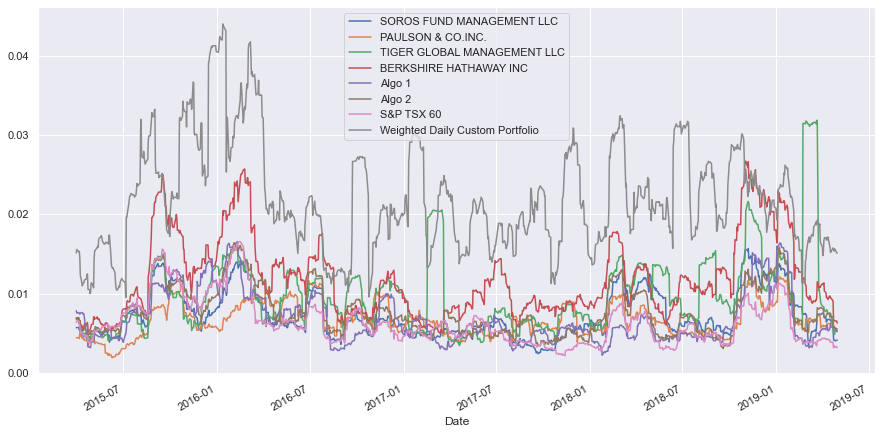

In [233]:
# 21-Day Window Rolling Standard Deviation (All Portfolios Including Weightted Custom Portfolio)
final_daily_returns_df.rolling(window=21).std().plot(figsize=(15,7.5))

#### d.) Daily Return Correlation Amongst All Portfolios Including Weighted Custom Portfolio

In [234]:
# Daily Return Correlation Amongst All Portfolios Including Weighted Custom Portfolio
final_daily_returns_correlation_df = final_daily_returns_df.corr()
final_daily_returns_correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Weighted Daily Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.697213,0.560731,0.750091,0.313787,0.826554,0.674055,0.441580
PAULSON & CO.INC.,0.697213,1.000000,0.433111,0.539889,0.266199,0.674220,0.486177,0.303204
TIGER GLOBAL MANAGEMENT LLC,0.560731,0.433111,1.000000,0.423308,0.161217,0.506383,0.440595,0.246273
BERKSHIRE HATHAWAY INC,0.750091,0.539889,0.423308,1.000000,0.289260,0.684485,0.556903,0.414996
Algo 1,0.313787,0.266199,0.161217,0.289260,1.000000,0.285471,0.310121,0.201064
Algo 2,0.826554,0.674220,0.506383,0.684485,0.285471,1.000000,0.737610,0.462974
S&P TSX 60,0.674055,0.486177,0.440595,0.556903,0.310121,0.737610,1.000000,0.374547
Weighted Daily Custom Portfolio,0.441580,0.303204,0.246273,0.414996,0.201064,0.462974,0.374547,1.000000


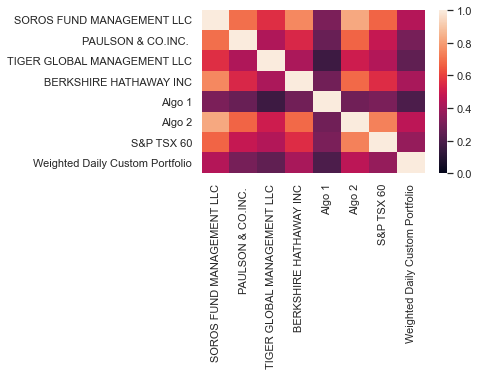

In [235]:
#Plot of Daily Return Correlation Amongst All Portfolios Including Weighted Custom Portfolio
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(final_daily_returns_correlation_df, vmin=0, vmax=1)

#### e.) Cumulative Price Correlation Amongst All Portfolios Including Weighted Custom Portfolio

In [236]:
# Cumulative Price Correlation Amongst All Portfolios Including Weighted Custom Portfolio
final_cumulative_returns_correlation_df = final_cumulative_returns_df.corr()
final_cumulative_returns_correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Weighted Custom Cumulative Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,-0.598509,0.431277,0.879182,0.418455,0.898206,0.809756,0.750901
PAULSON & CO.INC.,-0.598509,1.000000,-0.169294,-0.710314,-0.876348,-0.736379,-0.604371,-0.690048
TIGER GLOBAL MANAGEMENT LLC,0.431277,-0.169294,1.000000,0.066619,0.050300,0.244916,0.374740,-0.080217
BERKSHIRE HATHAWAY INC,0.879182,-0.710314,0.066619,1.000000,0.523483,0.920622,0.719853,0.895646
Algo 1,0.418455,-0.876348,0.050300,0.523483,1.000000,0.589648,0.528219,0.588283
Algo 2,0.898206,-0.736379,0.244916,0.920622,0.589648,1.000000,0.886510,0.856888
S&P TSX 60,0.809756,-0.604371,0.374740,0.719853,0.528219,0.886510,1.000000,0.730110
Weighted Custom Cumulative Portfolio,0.750901,-0.690048,-0.080217,0.895646,0.588283,0.856888,0.730110,1.000000


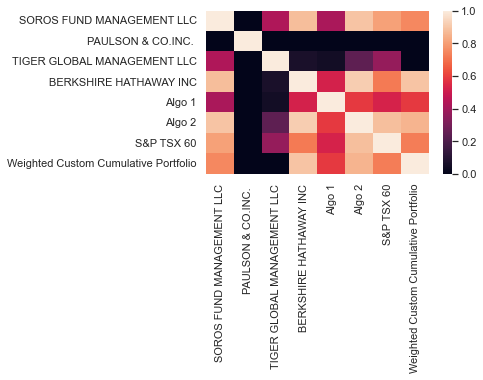

In [142]:
#Plot of Cumulative Price Correlation Amongst All Portfolios Including Weighted Custom Portfolio
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(final_cumulative_returns_correlation_df, vmin=0, vmax=1)

#### f.) Beta for 'Weighted Daily Custom Portfolio' Compared to the S&P 60 TSX

In [237]:
# Calculate covariance of 'Weighted Daily Custom Portfolio' vs. 'S&P TSX 60'
covariance_custom = final_daily_returns_df['Weighted Daily Custom Portfolio'].cov( final_daily_returns_df['S&P TSX 60'])
covariance_custom

6.019607960901126e-05

In [238]:
# Calculate the variance of the 'S&P TSX 60'
variance_b = final_daily_returns_df['S&P TSX 60'].var()
variance_b

4.9481074185484276e-05

In [239]:
# Calculate the Beta of All Daily Returns of 'Weighted Daily Custom Portfolio'
beta_custom = covariance_custom/variance_b
beta_custom

1.2165475507536643

#### g.) Calculate Sharpe's Ratio for 'Weighted Daily Custom Portfolio'

In [246]:
# Calculate Sharpe's Ratio for 'Weighted Daily Custom Portfolio'
sharpe_custom = (final_daily_returns_df.mean() * 252)/(final_daily_returns_df.std() * np.sqrt(252))
sharpe_custom = pd.DataFrame(sharpe_custom).rename(columns={0: "Sharpe Ratio"})
sharpe_custom = sharpe_custom.sort_values(by = 'Sharpe Ratio')
sharpe_custom

,Sharpe Ratio
PAULSON & CO.INC.,-0.534272
TIGER GLOBAL MANAGEMENT LLC,-0.132665
S&P TSX 60,0.225006
SOROS FUND MANAGEMENT LLC,0.301110
Algo 2,0.412780
BERKSHIRE HATHAWAY INC,0.485005
Weighted Daily Custom Portfolio,0.551994
Algo 1,1.496819


#### h.) Sharpe Ratio Bar Plot for 'Weighted Daily Custom Portfolio'

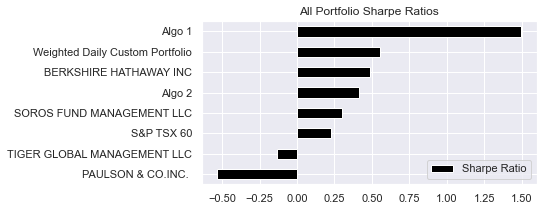

In [247]:
# Sharpe Ratio Bar Plot for 'Weighted Daily Custom Portfolio'
sharpe_custom.plot(kind="barh", figsize=(6,3), title="All Portfolio Sharpe Ratios", color="black", grid=True)

#### Therefore, the 'Weighted Daily Custom Portfolio' came in second behind Algo 1 in terms of Sharpe Ratio risk-to-return evaluation.